# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [111]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [112]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [113]:
print(data.shape)
print(data.describe())

print(data.info())



(5391, 6)
          Rank
count 5,391.00
mean  2,696.00
std   1,556.39
min       1.00
25%   1,348.50
50%   2,696.00
75%   4,043.50
max   5,391.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


In [114]:
print(data.isna().sum())

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [115]:
print(data.head())
data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"].str.replace(',', '').str.replace('$', ''))
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"].str.replace(',', '').str.replace('$', ''))
data["USD_Domestic_Gross"] = pd.to_numeric(data["USD_Domestic_Gross"].str.replace(',', '').str.replace('$', ''))
print(data.head())

   Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3          $3,000,000         $3,000,000  
4         $22,000,000        $11,000,000  
   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation                 110000   
1  5140     5/9/1916                     Intolerance                 385907   
2  5230   12/24/1916    20,000 Leagu

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [116]:

data["Release_Date"] = pd.to_datetime(data["Release_Date"])

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [117]:
print(data.describe())

          Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343,687.00  
max     

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [118]:
print(data[data["USD_Domestic_Gross"]==0])
data[data["USD_Domestic_Gross"]==0].sort_values(by="USD_Production_Budget",ascending=False).head(10)

      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
17    4814   1936-10-20  Charge of the Light Brigade, The   
27    4789   1941-10-28           How Green Was My Valley   
...    ...          ...                               ...   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0      

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [119]:
print(data[data["USD_Worldwide_Gross"]==0])
data[data["USD_Worldwide_Gross"]==0].sort_values(by="USD_Production_Budget",ascending=False).head(10)

      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
17    4814   1936-10-20  Charge of the Light Brigade, The   
27    4789   1941-10-28           How Green Was My Valley   
...    ...          ...                               ...   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0      

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

In [120]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
print(international_releases)

      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
157

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [121]:
subset = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross > 0")

print(subset.sort_values('USD_Worldwide_Gross',ascending=False))

      Rank Release_Date                             Movie_Title  \
2836  1270   2006-12-31         Les Bronzés 3: amis pour la vie   
4960  3283   2015-08-05                       La famille Bélier   
3809  2154   2010-12-31  Sammy's avonturen: De geheime doorgang   
3769  2776   2010-11-05                                Haeundae   
3051  2665   2007-12-31                                  Taxi 4   
...    ...          ...                                     ...   
5141  4076   2016-02-09                             Yoga Hosers   
3573  5015   2010-01-26                                  B-Girl   
5103  4625   2015-12-31             To Be Frank, Sinatra at 100   
4772  5005   2014-12-31                                 Destiny   
5061  4927   2015-11-12                           American Hero   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
2836               42000000             83833602                   0  
4960               11000000             74056184     

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [122]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
print(data[data.Release_Date > scrape_date])
print(data[data.Release_Date > scrape_date].shape[0])
data_clean = data[data.Release_Date <= scrape_date]

      Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000   

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [123]:
data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross].shape[0] / data_clean.shape[0]

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

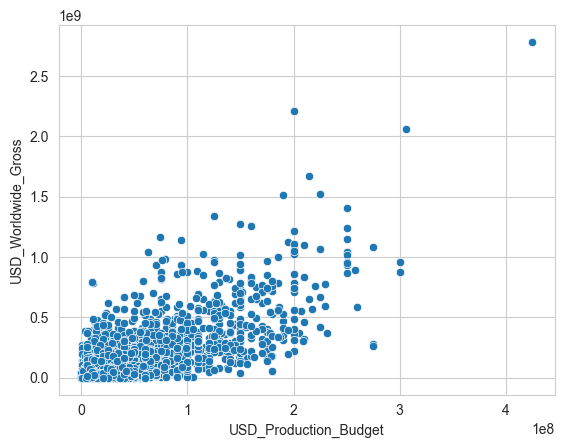

In [124]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



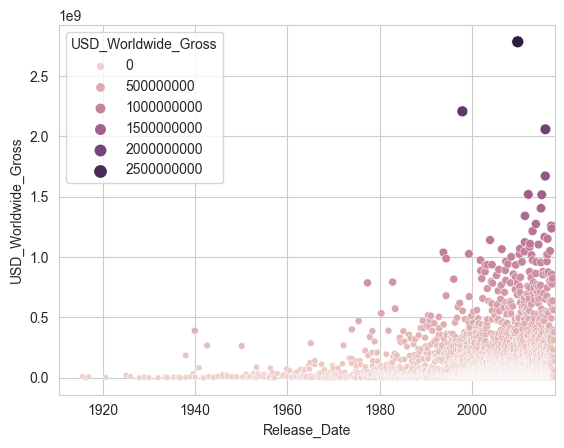

In [125]:
sns.set_style("whitegrid")  # Ajoute une grille
scatterplot = sns.scatterplot(data=data_clean,
                              x='Release_Date',
                              y='USD_Worldwide_Gross',
                                                   hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

scatterplot.set_xlim(right=data_clean['Release_Date'].max())

plt.show()  # Affiche le graphique

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [126]:
print(data_clean.dtypes)
data_clean["Decade"] = data_clean["Release_Date"].dt.year // 10 * 10
print(data_clean.head())

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object
   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
0             11000000            10000000    1910  
1                    0                   0    1910  
2              8000000             8000000    1910  
3              3000000             3000000    1920  
4     

C:\Users\henri.peters\AppData\Roaming\Local\Temp\ipykernel_15268\488645275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Decade"] = data_clean["Release_Date"].dt.year // 10 * 10


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [127]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >= 1970]

old_films.head()
old_films.shape[0]
old_films.sort_values('USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


# Seaborn Regression Plots

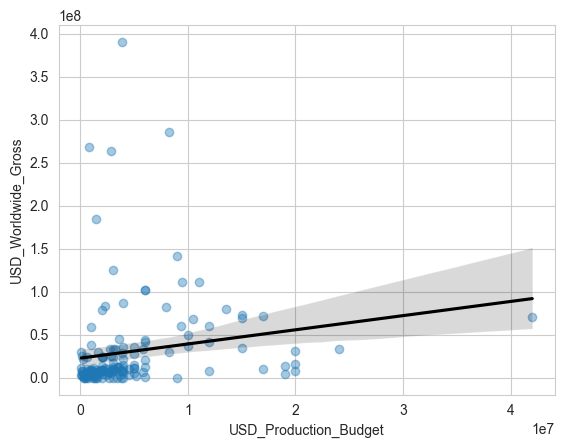

In [128]:

sns.regplot(x="USD_Production_Budget", y="USD_Worldwide_Gross", data=old_films,             scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

plt.show()
# %%
# %%

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

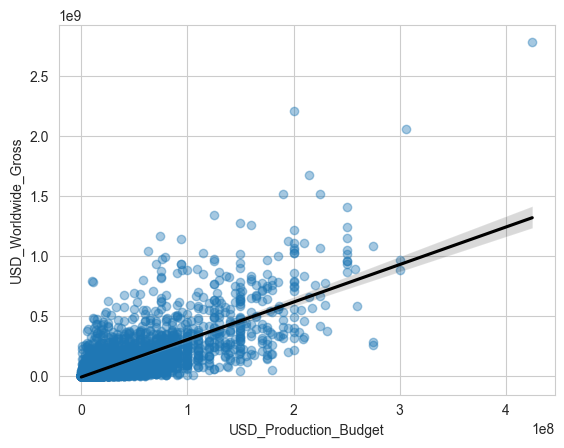

In [129]:

sns.regplot(x="USD_Production_Budget", y="USD_Worldwide_Gross", data=new_films,             scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

plt.show()
# %%
# %%

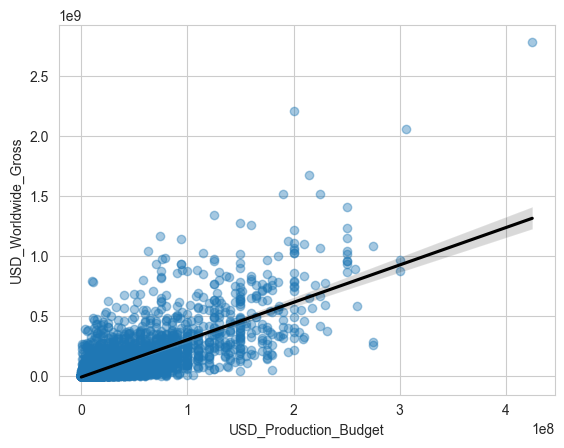

In [130]:

sns.regplot(x="USD_Production_Budget", y="USD_Worldwide_Gross", data=data_clean,             scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

plt.show()
# %%
# %%

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [134]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)
print(regression.score(X, y))


[-8650768.00661038]
[[3.12259592]]
0.5577032617720403


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [135]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)
print(regression.score(X, y))


[22821538.63508039]
[[1.64771314]]
0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [137]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
